In [41]:
#import sys
#!{sys.executable} -m pip install PyPDF2


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://imaxt.ast.cam.ac.uk/pip/
     |████████████████████████████████| 87 kB 4.7 MB/s             


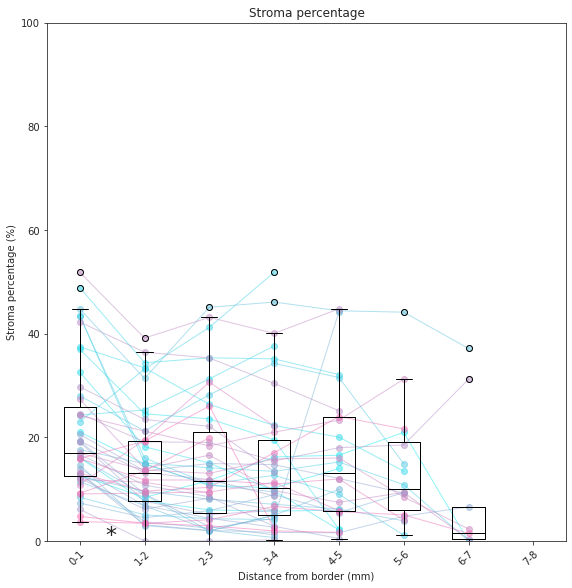

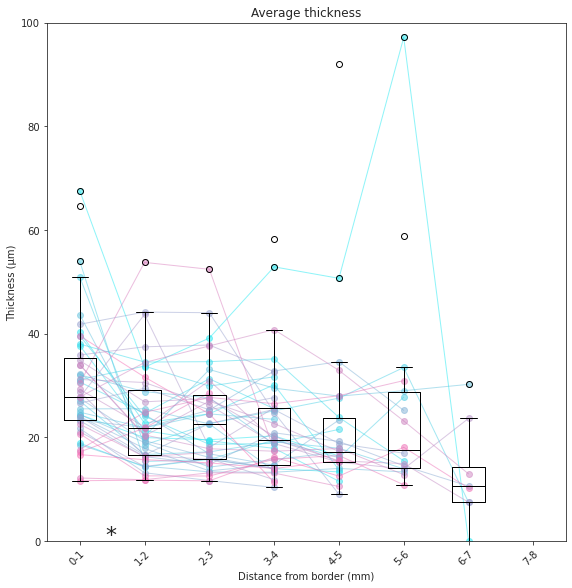

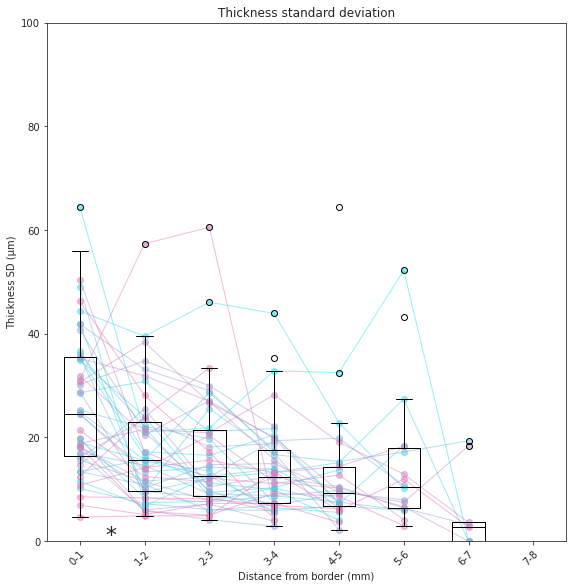

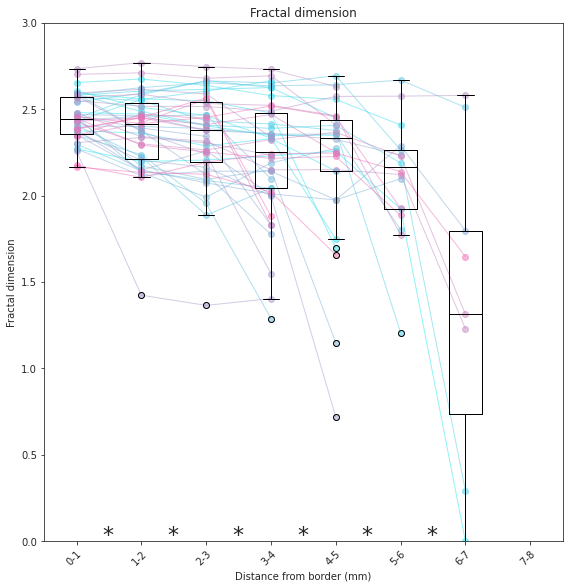

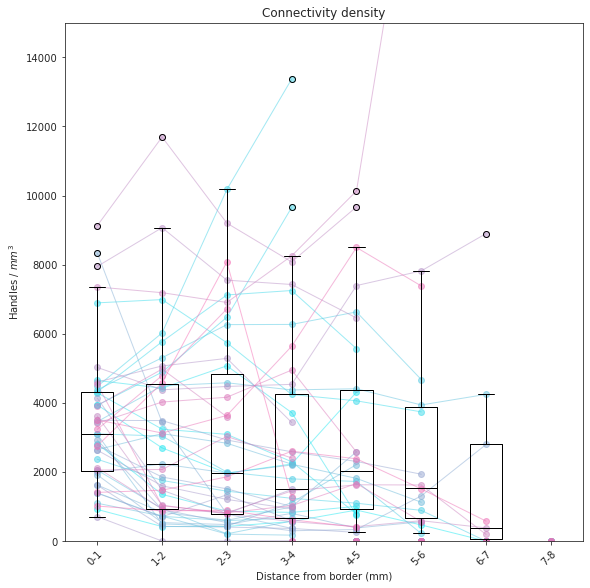

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 10 12:12:21 2020

@author: whitma01
"""

import math
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# sns.set(style="whitegrid")
sns.set_style("ticks")

colors = [(29/256.0, 236/256.0, 244/256.0),(253/256.0, 105/256.0, 179/256.0)]
cmap_name = 'my_list'
newcmp = LinearSegmentedColormap.from_list(cmap_name, colors, N=64)



#for mousetype in ['PAR', 'STG', 'AB']:

measures = ['stroma_percentage', 'average_thickness', 'standard_deviation_thickness', 'fractal_dimension', 'connectivity_density']


for measure in measures:
    #data = genfromtxt('measurements_'+mousetype+'_'+measure+'.csv', delimiter=',')
    #data = genfromtxt('measurements_STG_average_thickness.csv', delimiter=',')
    #data = genfromtxt('measurements_STG_standard_deviation_thickness.csv', delimiter=',')
    #data = genfromtxt('measurements_STG_fractal_dimension.csv', delimiter=',')
    #data = genfromtxt('measurements_STG_connectivity_density.csv', delimiter=',')
    data = genfromtxt('measurements_'+measure+'.csv', delimiter=',')


    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes


    for n in range(1, data.shape[0]):
        for m in range(0,8):
            if not np.any(data[n,m+1:m+3] == -1):
                ax.plot( range(m,m+2), data[n,m+1:m+3], marker='', color=newcmp(n/data.shape[0]), linewidth=1, alpha=0.5)

    for n in range(1, data.shape[0]):
        for m in range(0,8):
            if not data[n,m] == -1:
                ax.plot( m, data[n,m+1], marker='o', color=newcmp(n/data.shape[0]), linewidth=0, alpha=0.5)

    data1 = data[:,1]
    data2 = data[:,2]
    data3 = data[:,3]
    data4 = data[:,4]
    data5 = data[:,5]
    data6 = data[:,6]
    data7 = data[:,7]
    data8 = data[:,8]

    indices = np.where(data1==-1)
    data1 = np.delete(data1, indices)
    indices = np.where(data2==-1)
    data2 = np.delete(data2, indices)
    indices = np.where(data3==-1)
    data3 = np.delete(data3, indices)
    indices = np.where(data4==-1)
    data4 = np.delete(data4, indices)
    indices = np.where(data5==-1)
    data5 = np.delete(data5, indices)
    indices = np.where(data6==-1)
    data6 = np.delete(data6, indices)
    indices = np.where(data7==-1)
    data7 = np.delete(data7, indices)
    indices = np.where(data8==-1)
    data8 = np.delete(data8, indices)


    data_to_plot = [data1, data2, data3, data4, data5, data6, data7, data8]
    positions = [0,1,2,3,4,5,6,7]
    c = "black"
    ax.boxplot(data_to_plot, positions=positions,
                capprops=dict(color=c),
                whiskerprops=dict(color=c),
                flierprops=dict(color=c, markeredgecolor=c),
                medianprops=dict(color=c),
                )


    ax.set_xticks([0,1,2,3,4,5,6,7])
    ax.set_xticklabels(['0-1','1-2','2-3','3-4','4-5','5-6','6-7','7-8'])
    plt.xlabel('Distance from border (mm)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, rotation_mode='anchor', ha="right")


    if measure == 'stroma_percentage':
        plt.ylabel('Stroma percentage (%)')
        plt.ylim(0, 100)
        ax.set_title('Stroma percentage')
    if measure == 'average_thickness':
        plt.ylabel('Thickness (μm)')
        plt.ylim(0, 100)
        ax.set_title('Average thickness')
    if measure == 'standard_deviation_thickness':
        plt.ylabel('Thickness SD (μm)')
        plt.ylim(0, 100)
        ax.set_title('Thickness standard deviation')
    if measure == 'fractal_dimension':
        plt.ylabel('Fractal dimension')
        plt.ylim(0, 3)
        ax.set_title('Fractal dimension')
    if measure == 'connectivity_density':
        plt.ylabel('Handles / $mm^3$')
        plt.ylim(0, 15000)
        ax.set_title('Connectivity density')


    for n in range(1, 8):
        data1 = data[:,n]
        data2 = data[:,n+1]

        indices = np.where(data1==-1)
        data1 = np.delete(data1, indices)
        data2 = np.delete(data2, indices)
        indices = np.where(data2==-1)
        data1 = np.delete(data1, indices)
        data2 = np.delete(data2, indices)

        r, p = stats.ttest_rel(data1, data2)
        if not math.isnan(p) and p < 0.05:
            plt.text(n-0.6, 0, "*", fontsize=22)


    plt.savefig('measurements_'+measure+'.pdf', bbox_inches = 'tight')

In [6]:
from PyPDF2 import PdfMerger

pdfs = ['measurements_stroma_percentage.pdf', 'measurements_average_thickness.pdf', 'measurements_standard_deviation_thickness.pdf', 
        'measurements_connectivity_density.pdf', 'measurements_fractal_dimension.pdf']

merger = PdfMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("results.pdf")
merger.close()